In [1]:
import sys
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from datetime import datetime
import h5py
import scipy.stats as stats

# Set matplotlib style
%matplotlib widget
%load_ext autoreload
%autoreload 2
plt.style.use('../anemotaxis.mplstyle')
import core.data_loader as data_loader
import core.data_processor as data_processor
import viz.plot_data as plot_data
import utils.preprocessing as preprocessing

In [2]:
# Just provide your experiment dates here:
# experiment_dates_control = [
#     # timothee
#     '20240219_143334',
#     '20240223_112627', 
#     '20240226_145653',
#     '20240226_145653',
#     '20240226_163646',
#     '20240301_105819',
#     '20240301_121446',
#     '20240304_151714',
#     '20240304_162010',
#     '20240308_104430',
#     '20240308_124423',
#     # mine
#     '20250711_112928',
#     '20250712_115018',
#     '20250712_131147',
#     '20250715_112915',
#     '20250715_112915',
#     '20250801_111753',
#     '20250804_110703',
#     '20250805_103511',
#     '20250908_135226',
#     '20250908_140738'
# ]
# experiment_dates_ss01948 = [
#     '20240219_140808', 
#     '20240223_110610',
#     '20240226_160620',
#     '20240301_114359',
#     '20240304_153212',
#     '20240308_115957',
#     '20250620_114411',
#     '20250801_113341',
#     '20250804_120639',
#     '20250805_110603'
# ]

# experiment_dates_ss00864 = [
#     '20240219_151622',
#     '20240223_122519', 
#     '20240226_162227',
#     '20240301_115953',
#     '20240304_144626',
#     '20240308_123028',
#     '20250606_151520',
#     '20250610_151515',
#     '20250613_115904',
#     '20250616_112805',
#     '20250801_121925',
#     '20250802_125236',
#     '20250804_113758',
#     '20250805_113429'
# ]

# experiment_dates_mb143b = [
#     '20240226_152833',
#     '20240301_112859',
#     '20240304_143024',
#     '20240308_131239',
#     '20240614_150918',
#     '20250711_115827',
#     '20250712_124448',
#     '20250715_115737'
# ]

# experiment_dates_ss01696 = [
#     '20240219_155844',
#     '20240223_115010',
#     '20240226_170838',
#     '20240301_111323',
#     '20240304_141357',
#     '20240308_125815',
#     '20250711_122648',
#     '20250712_121626',
#     '20250715_110237'
# ]

# experiment_dates_ss01757 = [
#     '20240219_145347',
#     '20240223_120812',
#     '20240226_165304',
#     '20240301_104205',
#     '20240304_150157',
#     '20240308_121454',
#     '20250627_112155'
# ]

# experiment_dates_abby = [
#     '20250620_150116',
#     '20250624_151833',
#     '20250626_144339',
#     '20250908_142208',
#     '20250908_143537'
# ]

# experiment_dates_control_abby = [
#     '20250620_144253',
#     '20250624_143316',
#     '20250626_142647',
#     '20250908_135226',
#     '20250908_140738'
# ]
experimental_dates_ch95grad_p5grad2_Or42a_420s = [
    '20240517_131502', '20240524_100154', '20240610_104844', '20240617_110244',
    '20240621_091807', '20240624_112130', '20240712_115024', '20240712_121351',
    '20240715_112218', '20240715_114539', '20240718_111956', '20240718_114256',
    '20240719_091723', '20240719_094054'
]

control_dates_ch95grad_p5grad2_w1118_420s = [
    '20240517_154608', '20240524_122805', '20240610_151305', '20240617_142050',
    '20240621_141313', '20240624_150123', '20240712_162642', '20240712_163527',
    '20240715_170453', '20240715_172806', '20240718_164631', '20240718_171533',
    '20240719_144642', '20240719_150947'
]


In [4]:
# Define genotype configurations
# genotype_configs = {
#     'control': {
#         'name': 'W1118@20XUAS_CsChrimsom_mVenus',
#         'base_path': '/Users/sharbat/Projects/anemotaxis/data/t7/W1118@20XUAS_CsChrimsom_mVenus/ch_95grad_2s1x420s0s#p_5gradient2_2s1x420s0s#n#n',
#         'experiment_dates': control_dates_ch95grad_p5grad2_w1118_420s,
#         'linestyle': '--',
#         'alpha': 0.2,
#         'label': 'Control'
#     },
#     # 'ss01948': {
#     #     'name': 'GMR_SS01948@UAS_TNT_2_0003',
#     #     'base_path': '/Users/sharbat/Projects/anemotaxis/data/GMR_SS01948@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n',
#     #     'experiment_dates': experiment_dates_ss01948,
#     #     'linestyle': '-',
#     #     'alpha': 0.4,
#     #     'label': 'SS01948'
#     # }
#     # 'mb143b': {
#     #     'name': 'GMR_MB143B@UAS_TNT_2_0003',
#     #     'base_path': '/Users/sharbat/Projects/anemotaxis/data/GMR_MB143B@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n',
#     #     'experiment_dates': experiment_dates_mb143b,
#     #     'linestyle': '-',
#     #     'alpha': 0.4,
#     #     'label': 'MB143b'
#     # }
#     # 'ss00864': {
#     # 'name': 'GMR_SS00864@UAS_TNT_2_0003',
#     # 'base_path': '/Users/sharbat/Projects/anemotaxis/data/GMR_SS00864@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n',
#     # 'experiment_dates': experiment_dates_ss00864,
#     # 'linestyle': '-',
#     # 'alpha': 0.4,
#     # 'label': 'SS00864'
# #     'ss01696': {
# #     'name': 'GMR_SS01696@UAS_TNT_2_0003',
# #     'base_path': '/Users/sharbat/Projects/anemotaxis/data/GMR_SS01696@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n',
# #     'experiment_dates': experiment_dates_ss01696,
# #     'linestyle': '-',
# #     'alpha': 0.4,
# #     'label': 'SS01696'
# # }
#     # 'ss01757': {
#     #     'name': 'GMR_SS01757@UAS_TNT_2_0003',
#     #     'base_path': '/Users/sharbat/Projects/anemotaxis/data/GMR_SS01757@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n',
#     #     'experiment_dates': experiment_dates_ss01757,
#     #     'linestyle': '-',
#     #     'alpha': 0.4,
#     #     'label': 'SS01757'
#     # }
#     'or42a': {
#         'name': 'Or42a-GAL4_F48_1@20XUAS_CsChrimsom_mVenus',
#         'base_path': '/Users/sharbat/Projects/anemotaxis/data/t7/Or42a-GAL4_F48_1@20XUAS_CsChrimsom_mVenus/ch_95grad_2s1x420s0s#p_5gradient2_2s1x420s0s#n#n',
#         'experiment_dates': experimental_dates_ch95grad_p5grad2_Or42a_420s,
#         'linestyle': '-',
#         'alpha': 0.4,
#         'label': 'Or42a'
#     }
# }


genotype_configs = {
    'control': {
        'name': 'W1118@20XUAS_CsChrimsom_mVenus',
        'base_path': '/Users/sharbat/Projects/anemotaxis/data/t7/W1118@20XUAS_CsChrimsom_mVenus/ch_95grad_2s1x420s0s#p_5gradient2_2s1x420s0s#n#n',
        'experiment_dates': [
            '20240517_154608', '20240524_122805', '20240610_151305', '20240617_142050'
        ],
        'linestyle': '--',
        'alpha': 0.2,
        'label': 'Control'
    },
    'or42a': {
        'name': 'Or42a-GAL4_F48_1@20XUAS_CsChrimsom_mVenus',
        'base_path': '/Users/sharbat/Projects/anemotaxis/data/t7/Or42a-GAL4_F48_1@20XUAS_CsChrimsom_mVenus/ch_95grad_2s1x420s0s#p_5gradient2_2s1x420s0s#n#n',
        'experiment_dates': [
            '20240517_131502'
        ],
        'linestyle': '-',
        'alpha': 0.4,
        'label': 'Or42a'
    }
}
# Load data for all genotypes
genotype_data = {}
for genotype_key, config in genotype_configs.items():
    print(f"Loading {genotype_key}...")
    for date in config['experiment_dates']:
        print(f"  Processing date: {date}")
        # Optionally, check for existence of analysis files or add custom checks here
        # For debugging, you can check if the analysis file exists:
        analyses_dir = os.path.join(config['base_path'], date, 'analyses')
        if not os.path.exists(analyses_dir):
            print(f"⚠️  Analyses directory not found for {date}: {analyses_dir}")
        else:
            h5_files = glob.glob(os.path.join(analyses_dir, 'analysis_results_*.h5'))
            if not h5_files:
                print(f"⚠️  No analysis_results_*.h5 file found for {date}")
    # Only call load_genotype_data (this loads and combines all analysis for the genotype)
    try:
        genotype_data[genotype_key] = data_loader.load_genotype_data(genotype_key, config)
    except Exception as e:
        print(f"❌ Error loading genotype {genotype_key}: {e}")
        raise

# Set output directory
output_dir = '/Users/sharbat/Projects/anemotaxis/data/genotype_comparison'
os.makedirs(output_dir, exist_ok=True)

# Set output directory
output_dir = '/Users/sharbat/Projects/anemotaxis/data/genotype_comparison'
os.makedirs(output_dir, exist_ok=True)

Loading control...
  Processing date: 20240517_154608
  Processing date: 20240524_122805
  Processing date: 20240610_151305
  Processing date: 20240617_142050
🔄 Loading Control dataset...
✅ 20240517_154608: Using latest file with timestamp 20251126_105902
✅ 20240524_122805: Using latest file with timestamp 20251126_105922
✅ 20240610_151305: Using latest file with timestamp 20251126_105941
✅ 20240617_142050: Using latest file with timestamp 20251126_110001
❌ Error loading genotype control: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 20 and the array at index 1 has size 19


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 20 and the array at index 1 has size 19

In [23]:
def create_comprehensive_comparison_figure(genotype_data, output_dir):
    """Create a comprehensive 3x3 comparison figure with NI and behavioral data."""
    
    fig = plt.figure(figsize=(12,12))
    gs = GridSpec(3, 3, figure=fig, 
                  left=0.08, right=0.92,
                  top=0.93, bottom=0.07,
                  wspace=0.3, hspace=0.3)

    # ========================
    # TOP ROW: Navigational Index
    # ========================
    
    # Panel A: NI over time (both genotypes)
    ax1 = fig.add_subplot(gs[0, 0])
    
    for genotype_key, data in genotype_data.items():
        if 'ni_time_results' not in data or not data['ni_time_results']:
            continue
            
        ni_data = data['ni_time_results']
        style = data['metadata']['style']
        label = data['metadata']['label']
        
        if 'time_centers' in ni_data and 'mean_NI_x' in ni_data:
            time_centers = ni_data['time_centers']
            mean_ni_x = ni_data['mean_NI_x']
            se_ni_x = ni_data.get('se_NI_x', np.zeros_like(mean_ni_x))
            
            # Plot mean line
            ax1.plot(time_centers, mean_ni_x, 
                    linestyle=style['linestyle'], 
                    linewidth=2, 
                    label=f'{label} (NI_x)',
                    color='blue')
            
            # Plot error bars
            ax1.fill_between(time_centers, 
                           mean_ni_x - se_ni_x, 
                           mean_ni_x + se_ni_x,
                           alpha=style['se_alpha'], 
                           color='blue')
    
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Navigational Index (NI_x)')
    ax1.set_title('NI Over Time')
    ax1.legend()
    ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    ax1.set_xlim(0, 600)
    ax1.text(-0.15, 1.05, 'A', transform=ax1.transAxes, fontsize=14, fontweight='bold', va='top', ha='left')
    
    # Panel B: Control vs Experimental NI (box plot style, keep x/y spines)
    ax2 = fig.add_subplot(gs[0, 1])
    control_key = 'control'
    experimental_key = [k for k in genotype_data.keys() if k != control_key][0]
    control_data = genotype_data.get(control_key, {}).get('ni_single_results', {})
    experimental_data = genotype_data.get(experimental_key, {}).get('ni_single_results', {})
    if control_data and experimental_data:
        ni_x_control = control_data.get('NI_x_clean', [])
        ni_x_experimental = experimental_data.get('NI_x_clean', [])
        data = [ni_x_control, ni_x_experimental]
        positions = [1, 2]
        labels_box = [
            genotype_data[control_key]['metadata']['label'],
            genotype_data[experimental_key]['metadata']['label']
        ]
        colors = ['lightblue', 'lightcoral']
        bp = ax2.boxplot(data, positions=positions, widths=0.6, patch_artist=True, showmeans=False)
        for i, patch in enumerate(bp['boxes']):
            patch.set_facecolor(colors[i])
            patch.set_alpha(0.7)
            patch.set_edgecolor('black')
        for whisker in bp['whiskers']:
            whisker.set_color('black')
            whisker.set_linewidth(1.5)
        for cap in bp['caps']:
            cap.set_color('black')
            cap.set_linewidth(1.5)
        for median in bp['medians']:
            median.set_color('black')
            median.set_linewidth(2)
        # Individual points
        for i, d in enumerate(data):
            jitter = np.random.uniform(-0.15, 0.15, len(d))
            ax2.scatter([positions[i] + j for j in jitter], d, color=colors[i], s=18, alpha=0.8, edgecolors='black', linewidth=0.5, zorder=3)
        # Statistical annotation
        if len(ni_x_control) > 1 and len(ni_x_experimental) > 1:
            from scipy.stats import ttest_ind, mannwhitneyu
            t_stat, p_ttest = ttest_ind(ni_x_control, ni_x_experimental, nan_policy='omit')
            u_stat, p_mannwhitney = mannwhitneyu(ni_x_control, ni_x_experimental, alternative='two-sided')
            p_value = p_ttest
            if p_value < 0.001:
                ptext = "***"
                fontsize = 12
            elif p_value < 0.01:
                ptext = "**"
                fontsize = 12
            elif p_value < 0.05:
                ptext = "*"
                fontsize = 12
            else:
                ptext = "ns"
                fontsize = 12
            # Set y-limits so annotation is just below the top
            y_max = max(np.max(ni_x_control), np.max(ni_x_experimental))
            y_min = min(np.min(ni_x_control), np.min(ni_x_experimental))
            ax2.set_ylim(y_min - 0.05, y_max + 0.08)
            annotation_y = y_max + 0.03
            ax2.plot([positions[0], positions[1]], [annotation_y, annotation_y], 'k-', lw=1.5)
            ax2.text(np.mean(positions), annotation_y + 0.01, ptext, ha='center', va='bottom', fontsize=fontsize)
            # Print stats
            print(f"NI_x comparison ({labels_box[0]} vs {labels_box[1]}):")
            print(f"  t-test p-value: {p_ttest:.4g}")
            print(f"  Mann-Whitney p-value: {p_mannwhitney:.4g}")
            print(f"  Median {labels_box[0]}: {np.median(ni_x_control):.3f}")
            print(f"  Median {labels_box[1]}: {np.median(ni_x_experimental):.3f}")
        ax2.set_xticks(positions)
        ax2.set_xticklabels(labels_box)
        ax2.set_ylabel('NI_x')
        ax2.set_title('NI_x: Control vs Experimental')
        ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        ax2.text(-0.15, 1.05, 'B', transform=ax2.transAxes, fontsize=14, fontweight='bold', va='top', ha='left')
        # Only remove top/right spines for box plot look
        ax2.spines['top'].set_visible(False)
        ax2.spines['right'].set_visible(False)
        ax2.tick_params(left=True, bottom=True)

    # Panel C: NI by date for both genotypes (stacked subplots, no headings/ticks)
    from matplotlib.gridspec import GridSpecFromSubplotSpec
    gs_c = GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[0, 2], hspace=0.05)
    ax2a = fig.add_subplot(gs_c[0])
    ax2b = fig.add_subplot(gs_c[1])
    # Control NI by date
    if control_data and 'NI_x_by_date' in control_data:
        ni_x_by_date = control_data['NI_x_by_date']
        dates = sorted(ni_x_by_date.keys())
        box_data = [ni_x_by_date[date] for date in dates]
        bp = ax2a.boxplot(box_data, labels=[d[:8] for d in dates], patch_artist=True)
        for patch in bp['boxes']:
            patch.set_facecolor('lightblue')
            patch.set_alpha(0.7)
        ax2a.set_ylabel('NI_x')
        ax2a.set_title('NI_x per date', fontsize=12)
        ax2a.tick_params(axis='x', labelsize=0, length=0)  # Remove tick labels
        ax2a.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

    # Experimental NI by date
    if experimental_data and 'NI_x_by_date' in experimental_data:
        ni_x_by_date = experimental_data['NI_x_by_date']
        dates = sorted(ni_x_by_date.keys())
        box_data = [ni_x_by_date[date] for date in dates]
        bp = ax2b.boxplot(box_data, labels=[d[:8] for d in dates], patch_artist=True)
        for patch in bp['boxes']:
            patch.set_facecolor('lightcoral')
            patch.set_alpha(0.7)
        ax2b.set_ylabel('NI_x')
        ax2b.set_title('')  # No title for bottom plot
        ax2b.tick_params(axis='x', labelsize=0, length=0)  # Remove tick labels
        ax2b.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        from matplotlib.patches import Patch
        legend_elements = [
            Patch(facecolor='lightblue', edgecolor='black', label=labels_box[0]),
            Patch(facecolor='lightcoral', edgecolor='black', label=labels_box[1])
        ]
        ax2b.legend(handles=legend_elements, loc='upper right', frameon=False, fontsize=11)
    # Remove x-label from top, add only to bottom
    ax2a.set_xlabel('')
    ax2b.set_xlabel('Experiment Date')
    ax2a.text(-0.15, 1.05, 'C', transform=ax2a.transAxes, fontsize=14, fontweight='bold', va='top', ha='left')
    
    # ========================
    # MIDDLE ROW: Run Velocity
    # ========================
    
    # Panel D: Run velocity histogram
    ax4 = fig.add_subplot(gs[1, 0])
    plot_data.plot_genotype_comparison(genotype_data, 'velocity_results', 'histogram', 
                           ax=ax4, ylabel='Run Velocity (BL/s)', show_xlabel=False,
                           color='black')
    ax4.text(-0.15, 1.05, 'D', transform=ax4.transAxes, fontsize=14, fontweight='bold', va='top', ha='left')
    
    # Panel E: Run velocity polar
    ax5 = fig.add_subplot(gs[1, 1], projection='polar')
    plot_data.plot_genotype_comparison(genotype_data, 'velocity_results', 'polar', ax=ax5)
    ax5_pos = ax5.get_position()
    ax5.set_position([ax5_pos.x0 - 0.02, ax5_pos.y0, ax5_pos.width, ax5_pos.height])
    ax5.text(-0.2, 1.1, 'E', transform=ax5.transAxes, fontsize=14, fontweight='bold', va='top', ha='left')
    
    # Panel F: Run velocity time series
    ax6 = fig.add_subplot(gs[1, 2])
    plot_data.plot_genotype_comparison(genotype_data, 'velocity_time_results', 'time_series', 
                           ax=ax6, show_xlabel=False, color='black')
    ax6.text(-0.15, 1.05, 'F', transform=ax6.transAxes, fontsize=14, fontweight='bold', va='top', ha='left')
    
    # ========================
    # BOTTOM ROW: Turn Amplitude
    # ========================
    
    # Panel G: Turn amplitude histogram
    ax7 = fig.add_subplot(gs[2, 0])
    plot_data.plot_genotype_comparison(genotype_data, 'turn_amp_results', 'histogram', 
                           ax=ax7, ylabel='Turn Amplitude (°)', show_xlabel=True,
                           color='red', min_amplitude=45)  # Changed to avoid conflict
    ax7.text(-0.15, 1.05, 'G', transform=ax7.transAxes, fontsize=14, fontweight='bold', va='top', ha='left')
    
    # Panel H: Turn amplitude polar
    ax8 = fig.add_subplot(gs[2, 1], projection='polar')
    plot_data.plot_genotype_comparison(genotype_data, 'turn_amp_results', 'polar', ax=ax8, 
                           min_amplitude=45)  # Fixed parameter passing
    ax8_pos = ax8.get_position()
    ax8.set_position([ax8_pos.x0 - 0.02, ax8_pos.y0, ax8_pos.width, ax8_pos.height])
    ax8.text(-0.2, 1.1, 'H', transform=ax8.transAxes, fontsize=14, fontweight='bold', va='top', ha='left')
    
    # Panel I: Turn amplitude time series
    ax9 = fig.add_subplot(gs[2, 2])
    plot_data.plot_genotype_comparison(genotype_data, 'turn_amp_time_results', 'time_series', 
                           ax=ax9, show_xlabel=True, color='red',
                           min_amplitude=45)  # Fixed parameter passing
    ax9.text(-0.15, 1.05, 'I', transform=ax9.transAxes, fontsize=14, fontweight='bold', va='top', ha='left')
    7
    # Create filename with genotype names
    genotype_labels = [data['metadata']['label'] for data in genotype_data.values()]
    genotype_string = '_vs_'.join(genotype_labels)
    filename = f'comprehensive_ni_behavioral_comparison_{genotype_string}.pdf'
    
    # Save figure
    fig.savefig(os.path.join(output_dir, filename), 
                bbox_inches='tight', dpi=300, transparent=True, facecolor='none')
    print(f"Comprehensive comparison figure saved to: {os.path.join(output_dir, filename)}")
    
    
    return fig

# Create the comprehensive comparison figure
fig_comprehensive = create_comprehensive_comparison_figure(genotype_data, output_dir)
plt.show()

NI_x comparison (Control vs Or42a):
  t-test p-value: 0.672
  Mann-Whitney p-value: 0.5208
  Median Control: -0.099
  Median Or42a: -0.107


/var/folders/qs/_71td1zx7kjd4t5xhw9wndn00000gp/T/ipykernel_8887/3566447147.py:138: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2a.boxplot(box_data, labels=[d[:8] for d in dates], patch_artist=True)
/var/folders/qs/_71td1zx7kjd4t5xhw9wndn00000gp/T/ipykernel_8887/3566447147.py:152: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2b.boxplot(box_data, labels=[d[:8] for d in dates], patch_artist=True)


ValueError: operands could not be broadcast together with shapes (23,) (21,) 

ValueError: 'vertices' must be 2D with shape (N, 2), but your input has shape (0,)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous view', 'arrow-left', 'back'), ('Forward', 'Forward to next view', 'arrow-right', 'forward'), ('Pan', 'Left button pans, Right button zooms\nx/y fixes axis, CTRL fixes aspect', 'arrows', 'pan'), ('Zoom', 'Zoom to rectangle\nx/y fixes axis', 'square-o', 'zoom'), ('Download', 'Download plot', 'floppy-o', 'save_figure')]))

ValueError: 'vertices' must be 2D with shape (N, 2), but your input has shape (0,)

Behavioral probability comparison figure saved to: /Users/sharbat/Projects/anemotaxis/data/genotype_comparison/behavioral_probability_comparison_Control_vs_Or42a.pdf


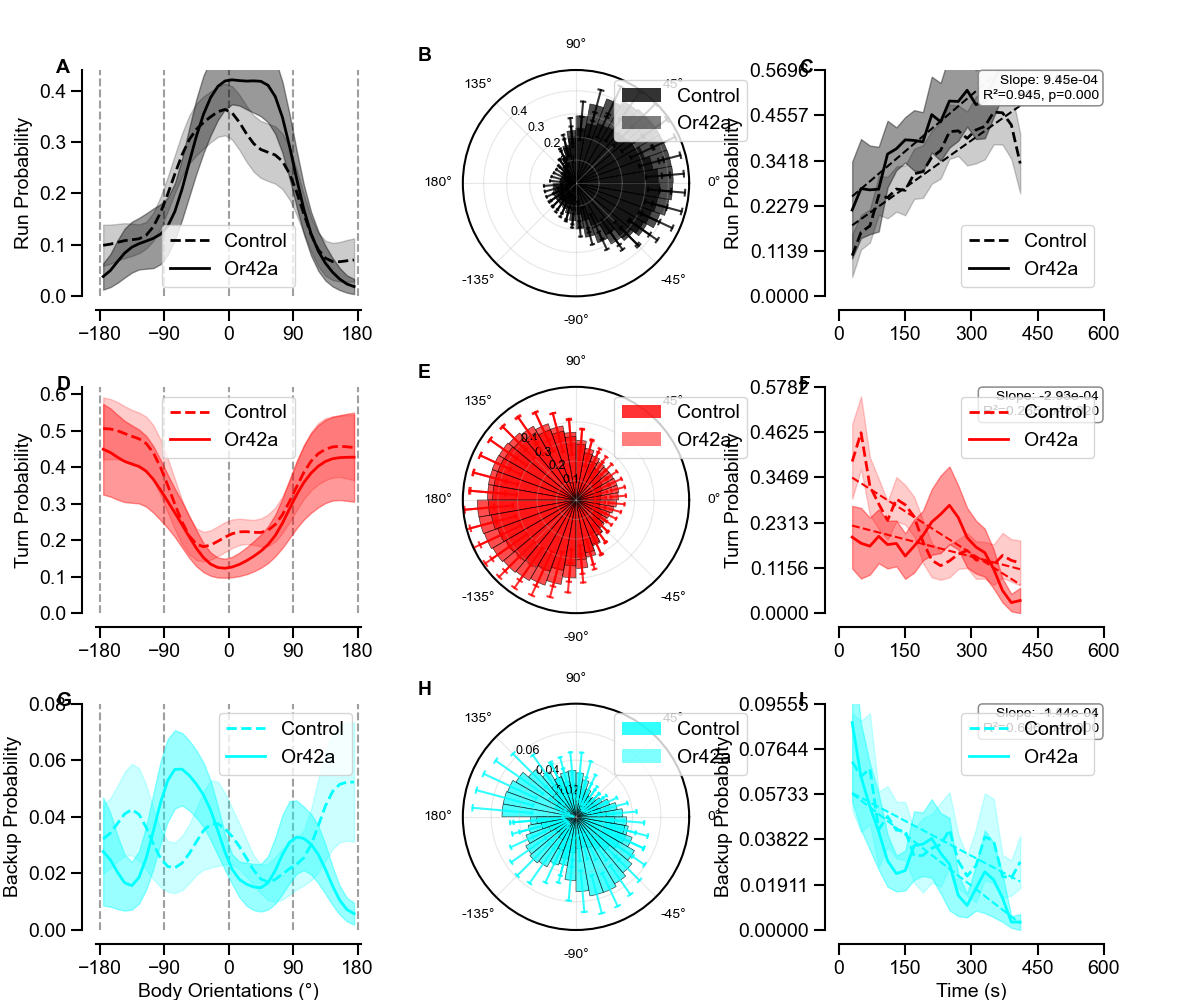

In [20]:
# Create genotype comparison figure for behavioral probabilities
def create_behavioral_probability_comparison(genotype_data, output_dir):
    """Create a 3x3 comparison figure for run, turn, and backup probabilities."""
    
    fig = plt.figure(figsize=(12, 10))
    gs = GridSpec(3, 3, figure=fig, 
                  left=0.08, right=0.92,
                  top=0.93, bottom=0.07,
                  wspace=0.4, hspace=0.4,
                  width_ratios=[0.6, 0.6, 0.6])

    # ========================
    # TOP ROW: Run Probability
    # ========================
    
    # Panel A: Run probability histogram
    ax1 = fig.add_subplot(gs[0, 0])
    plot_data.plot_genotype_comparison(genotype_data, 'run_prob_results', 'histogram', 
                           ax=ax1, ylabel='Run Probability', show_xlabel=False,
                           plot_type='run')
    ax1.text(-0.15, 1.05, 'A', transform=ax1.transAxes, fontsize=14, fontweight='bold', va='top', ha='left')
    
    # Panel B: Run probability polar
    ax2 = fig.add_subplot(gs[0, 1], projection='polar')
    plot_data.plot_genotype_comparison(genotype_data, 'run_prob_results', 'polar', ax=ax2)
    ax2_pos = ax2.get_position()
    ax2.set_position([ax2_pos.x0 - 0.02, ax2_pos.y0, ax2_pos.width, ax2_pos.height])
    ax2.text(-0.2, 1.1, 'B', transform=ax2.transAxes, fontsize=14, fontweight='bold', va='top', ha='left')
    
    # Panel C: Run probability time series
    ax3 = fig.add_subplot(gs[0, 2])
    plot_data.plot_genotype_comparison(genotype_data, 'run_prob_time_results', 'time_series', 
                           ax=ax3, show_xlabel=False, plot_type='run')
    ax3.text(-0.15, 1.05, 'C', transform=ax3.transAxes, fontsize=14, fontweight='bold', va='top', ha='left')

    # ========================
    # MIDDLE ROW: Turn Probability
    # ========================
    
    # Panel D: Turn probability histogram
    ax4 = fig.add_subplot(gs[1, 0])
    plot_data.plot_genotype_comparison(genotype_data, 'turn_prob_results', 'histogram', 
                           ax=ax4, ylabel='Turn Probability', show_xlabel=False,
                           plot_type='turn')
    ax4.text(-0.15, 1.05, 'D', transform=ax4.transAxes, fontsize=14, fontweight='bold', va='top', ha='left')
    
    # Panel E: Turn probability polar
    ax5 = fig.add_subplot(gs[1, 1], projection='polar')
    plot_data.plot_genotype_comparison(genotype_data, 'turn_prob_results', 'polar', ax=ax5)
    ax5_pos = ax5.get_position()
    ax5.set_position([ax5_pos.x0 - 0.02, ax5_pos.y0, ax5_pos.width, ax5_pos.height])
    ax5.text(-0.2, 1.1, 'E', transform=ax5.transAxes, fontsize=14, fontweight='bold', va='top', ha='left')
    
    # Panel F: Turn probability time series
    ax6 = fig.add_subplot(gs[1, 2])
    plot_data.plot_genotype_comparison(genotype_data, 'turn_prob_time_results', 'time_series', 
                           ax=ax6, show_xlabel=False, plot_type='turn')
    ax6.text(-0.15, 1.05, 'F', transform=ax6.transAxes, fontsize=14, fontweight='bold', va='top', ha='left')

    # ========================
    # BOTTOM ROW: Backup Probability
    # ========================
    
    # Panel G: Backup probability histogram
    ax7 = fig.add_subplot(gs[2, 0])
    plot_data.plot_genotype_comparison(genotype_data, 'backup_prob_results', 'histogram', 
                           ax=ax7, ylabel='Backup Probability', show_xlabel=True,
                           plot_type='backup', color='cyan')
    ax7.text(-0.15, 1.05, 'G', transform=ax7.transAxes, fontsize=14, fontweight='bold', va='top', ha='left')
    
    # Panel H: Backup probability polar
    ax8 = fig.add_subplot(gs[2, 1], projection='polar')
    plot_data.plot_genotype_comparison(genotype_data, 'backup_prob_results', 'polar', ax=ax8)
    ax8_pos = ax8.get_position()
    ax8.set_position([ax8_pos.x0 - 0.02, ax8_pos.y0, ax8_pos.width, ax8_pos.height])
    ax8.text(-0.2, 1.1, 'H', transform=ax8.transAxes, fontsize=14, fontweight='bold', va='top', ha='left')
    
    # Panel I: Backup probability time series
    ax9 = fig.add_subplot(gs[2, 2])
    plot_data.plot_genotype_comparison(genotype_data, 'backup_prob_time_results', 'time_series', 
                           ax=ax9, show_xlabel=True, plot_type='backup')
    ax9.text(-0.15, 1.05, 'I', transform=ax9.transAxes, fontsize=14, fontweight='bold', va='top', ha='left')
    
    # Create filename with genotype names
    genotype_labels = [data['metadata']['label'] for data in genotype_data.values()]
    genotype_string = '_vs_'.join(genotype_labels)
    filename = f'behavioral_probability_comparison_{genotype_string}.pdf'
    
    # Save figure
    fig.savefig(os.path.join(output_dir, filename), 
                bbox_inches='tight', dpi=300, transparent=True, facecolor='none')
    print(f"Behavioral probability comparison figure saved to: {os.path.join(output_dir, filename)}")
    

# Create the behavioral probability comparison figure
fig_behavioral = create_behavioral_probability_comparison(genotype_data, output_dir)
plt.show()


=== MEDIANS AND QUARTILES ===
Towards Wind - Median: 1.000, Q1: 0.375, Q3: 1.000
Away from Wind - Median: 0.000, Q1: 0.000, Q3: 0.625

=== MEDIANS AND QUARTILES ===
Towards Wind - Median: 0.417, Q1: 0.000, Q3: 0.625
Away from Wind - Median: 0.583, Q1: 0.375, Q3: 1.000

=== MEDIANS AND QUARTILES ===
Towards Wind - Median: 0.500, Q1: 0.333, Q3: 0.600
Away from Wind - Median: 0.500, Q1: 0.400, Q3: 0.667

=== MEDIANS AND QUARTILES ===
Towards Wind - Median: 0.400, Q1: 0.000, Q3: 0.472
Away from Wind - Median: 0.600, Q1: 0.528, Q3: 1.000
Head cast comprehensive comparison figure saved to: /Users/sharbat/Projects/anemotaxis/data/genotype_comparison/head_cast_comprehensive_comparison_Control_vs_Or42a.pdf


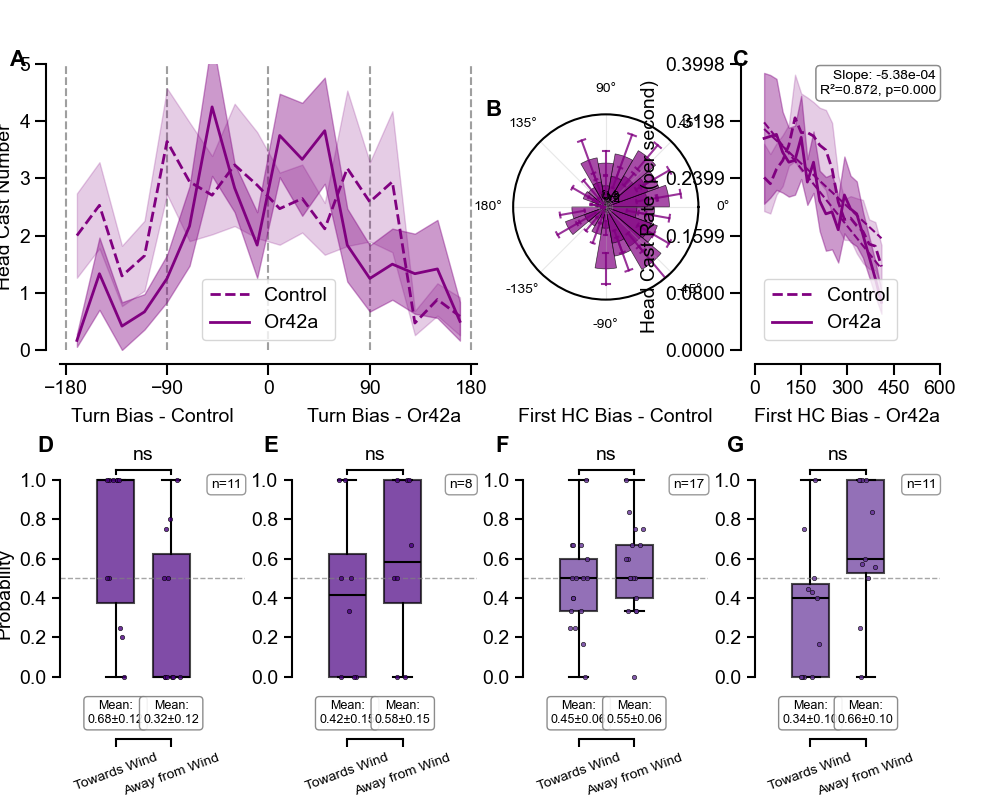

In [21]:
def create_head_cast_comprehensive_comparison(genotype_data, output_dir):
    """Create a comprehensive head cast comparison figure with analysis and bias plots."""
    
    # Adjusted figure size for better proportions
    fig = plt.figure(figsize=(10,8))  # Wider for better panel distribution
    gs = GridSpec(2, 4, figure=fig, 
                  left=0.06, right=0.94,
                  top=0.92, bottom=0.08,
                  wspace=0.25, hspace=0.35,
                  width_ratios=[1.0, 1.0, 1.0, 1.0],  # Equal width for all 4 bottom panels
                  height_ratios=[1, 1])  # Equal height for both rows

    # ========================
    # TOP ROW: Head Cast Orientation Analysis Comparison (3 panels spanning 4 columns)
    # ========================
    
    # Panel A: Head cast orientation histogram comparison (spans columns 0-1)
    ax1 = fig.add_subplot(gs[0, :2])  # Span first 2 columns
    plot_data.plot_genotype_comparison(genotype_data, 'head_cast_orientation_results', 'histogram', 
                           ax=ax1, ylabel='Head Cast Number', show_xlabel=False,
                           plot_type='head_cast', ylim=[0, 5])
    ax1.text(-0.12, 1.05, 'A', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
    
    # Panel B: Head cast orientation polar comparison (column 2)
    ax2 = fig.add_subplot(gs[0, 2], projection='polar')
    plot_data.plot_genotype_comparison(genotype_data, 'head_cast_orientation_results', 'polar', ax=ax2, 
                           plot_type='head_cast')
    # Remove legend from polar plot
    if ax2.get_legend():
        ax2.get_legend().remove()
    ax2_pos = ax2.get_position()
    ax2.set_position([ax2_pos.x0 - 0.01, ax2_pos.y0, ax2_pos.width, ax2_pos.height])
    ax2.text(-0.15, 1.08, 'B', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
    
    # Panel C: Head cast rate time series comparison (column 3)
    ax3 = fig.add_subplot(gs[0, 3])
    plot_data.plot_genotype_comparison(genotype_data, 'head_cast_time_results', 'time_series', 
                           ax=ax3, show_xlabel=False, plot_type='head_cast',
                           ylabel='Head Cast Rate (per second)')
    ax3.text(-0.12, 1.05, 'C', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')

    # ========================
    # BOTTOM ROW: Bias Analysis - Turn Bias (D,E) and First HC Bias (F,G)
    # ========================
    
    # Get genotype data
    genotype_keys = list(genotype_data.keys())
    genotype_labels = [genotype_data[key]['metadata']['label'] for key in genotype_keys]
    
    # Panel D: Control Turn Bias (column 0)
    ax4 = fig.add_subplot(gs[1, 0])
    control_data = genotype_data[genotype_keys[0]]
    control_label = control_data['metadata']['label']
    if 'bias_results_turn' in control_data and control_data['bias_results_turn']:
        plot_data.plot_head_cast_bias_perpendicular(
            control_data['bias_results_turn'],
            ax=ax4,
            title=f'Turn Bias - {control_label}'
        )
    ax4.text(-0.12, 1.05, 'D', transform=ax4.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
    
    # Panel E: Experimental Genotype Turn Bias (column 1)
    ax5 = fig.add_subplot(gs[1, 1])
    if len(genotype_keys) > 1:
        experimental_data = genotype_data[genotype_keys[1]]
        experimental_label = experimental_data['metadata']['label']
        if 'bias_results_turn' in experimental_data and experimental_data['bias_results_turn']:
            plot_data.plot_head_cast_bias_perpendicular(
                experimental_data['bias_results_turn'],
                ax=ax5,
                title=f'Turn Bias - {experimental_label}'
            )
    ax5.set_ylabel('')  # Remove y-label for consistency
    ax5.text(-0.15, 1.05, 'E', transform=ax5.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
    
    # Panel F: Control First HC Bias (column 2)
    ax6 = fig.add_subplot(gs[1, 2])
    if 'bias_results_first' in control_data and control_data['bias_results_first']:
        plot_data.plot_head_cast_bias_perpendicular(
            control_data['bias_results_first'],
            ax=ax6,
            title=f'First HC Bias - {control_label}'
        )
    ax6.set_ylabel('')  # Remove y-label for consistency
    ax6.text(-0.15, 1.05, 'F', transform=ax6.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
    
    # Panel G: Experimental Genotype First HC Bias (column 3)
    ax7 = fig.add_subplot(gs[1, 3])
    if len(genotype_keys) > 1:
        if 'bias_results_first' in experimental_data and experimental_data['bias_results_first']:
            plot_data.plot_head_cast_bias_perpendicular(
                experimental_data['bias_results_first'],
                ax=ax7,
                title=f'First HC Bias - {experimental_label}'
            )
    ax7.set_ylabel('')  # Remove y-label for consistency
    ax7.text(-0.15, 1.05, 'G', transform=ax7.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
    
    # Create filename with genotype names
    genotype_string = '_vs_'.join(genotype_labels)
    filename = f'head_cast_comprehensive_comparison_{genotype_string}.pdf'
    
    # Save figure
    fig.savefig(os.path.join(output_dir, filename), 
                bbox_inches='tight', dpi=300, transparent=True, facecolor='none')
    print(f"Head cast comprehensive comparison figure saved to: {os.path.join(output_dir, filename)}")
    
    return fig

# Create the comprehensive head cast comparison figure
fig_head_cast_comprehensive = create_head_cast_comprehensive_comparison(genotype_data, output_dir)
plt.show()

In [22]:
# import json
# import numpy as np

# def save_figure_metadata(output_dir, figure_name, result_files, additional_info=None):
#     """
#     Save metadata about the files and parameters used to generate a figure.
    
#     Args:
#         output_dir: Directory where the figure and metadata are saved
#         figure_name: Name of the figure (without extension)
#         result_files: List of HDF5 files used to generate the figure
#         additional_info: Optional dictionary with additional metadata
#     """
#     def convert_numpy_types(obj):
#         """Convert numpy types to Python native types for JSON serialization."""
#         if isinstance(obj, np.integer):
#             return int(obj)
#         elif isinstance(obj, np.floating):
#             return float(obj)
#         elif isinstance(obj, np.ndarray):
#             return obj.tolist()
#         elif isinstance(obj, dict):
#             return {key: convert_numpy_types(value) for key, value in obj.items()}
#         elif isinstance(obj, list):
#             return [convert_numpy_types(item) for item in obj]
#         elif isinstance(obj, tuple):
#             return tuple(convert_numpy_types(item) for item in obj)
#         else:
#             return obj
    
#     metadata = {
#         'figure_name': figure_name,
#         'generated_date': datetime.now().isoformat(),
#         'source_files': [],
#         'total_larvae': 0,
#         'experiment_dates': [],
#         'analysis_info': additional_info or {}
#     }
    
#     # Extract information from each source file
#     for filepath in result_files:
#         try:
#             results = load_analysis_results(filepath)
#             source_metadata = results.get('metadata', {})
            
#             # Extract experiment date from path
#             path_parts = filepath.split('/')
#             experiment_date = 'unknown'
#             for part in path_parts:
#                 if len(part) == 15 and part.startswith('202'):  # Format: 20240226_145653
#                     experiment_date = part
#                     break
            
#             file_info = {
#                 'filepath': filepath,
#                 'original_trx_file': source_metadata.get('source_file', 'unknown'),
#                 'analysis_date': source_metadata.get('created_date', 'unknown'),
#                 'n_larvae': int(source_metadata.get('n_larvae_total', 0)),  # Convert to int
#                 'experiment_date': experiment_date
#             }
            
#             metadata['source_files'].append(file_info)
#             metadata['total_larvae'] += file_info['n_larvae']
            
#             if experiment_date not in metadata['experiment_dates']:
#                 metadata['experiment_dates'].append(experiment_date)
                
#         except Exception as e:
#             print(f"⚠️  Could not extract metadata from {filepath}: {e}")
    
#     # Sort experiment dates
#     metadata['experiment_dates'].sort()
    
#     # Add summary statistics
#     metadata['summary'] = {
#         'n_source_files': len(result_files),
#         'n_experiments': len(metadata['experiment_dates']),
#         'total_larvae': metadata['total_larvae'],
#         'date_range': f"{metadata['experiment_dates'][0]} to {metadata['experiment_dates'][-1]}" if metadata['experiment_dates'] else "unknown"
#     }
    
#     # Convert all numpy types to Python types
#     metadata = convert_numpy_types(metadata)
    
#     # Save metadata as JSON
#     metadata_filepath = os.path.join(output_dir, f'{figure_name}_metadata.json')
#     with open(metadata_filepath, 'w') as f:
#         json.dump(metadata, f, indent=2)
    
#     print(f"📋 Metadata saved to: {metadata_filepath}")
#     return metadata_filepath

# # Save metadata for the main behavioral analysis figure
# behavioral_metadata = save_figure_metadata(
#     output_dir, 
#     'behavioral_analysis_summary',
#     result_files,
#     additional_info={
#         'analysis_types': ['run_probability', 'turn_probability', 'backup_probability'],
#         'plot_types': ['linear_orientation', 'polar_orientation', 'time_series'],
#         'parameters': {
#             'run_prob_ylim': [0, 0.5],  # Convert tuple to list
#             'turn_prob_ylim': [0, 0.4],
#             'backup_prob_ylim': [0, 0.1]
#         },
#         'figure_layout': '3x3 grid',
#         'genotype': 'FCF_attP2-40@UAS_TNT_2_0003',
#         'condition': 'p_5gradient2_2s1x600s0s#n#n#n'
#     }
# )

# # Save metadata for the velocity & amplitude analysis figure  
# velocity_metadata = save_figure_metadata(
#     output_dir,
#     'velocity_amplitude_analysis', 
#     result_files,
#     additional_info={
#         'analysis_types': ['run_velocity', 'turn_amplitude'],
#         'plot_types': ['linear_orientation', 'polar_orientation', 'time_series'],
#         'parameters': {
#             'min_turn_amplitude': 60,
#             'velocity_units': 'body_lengths_per_second',
#             'amplitude_units': 'degrees'
#         },
#         'figure_layout': '2x3 grid',
#         'genotype': 'FCF_attP2-40@UAS_TNT_2_0003',
#         'condition': 'p_5gradient2_2s1x600s0s#n#n#n'
#     }
# )